In [1]:

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import yaml


In [2]:
new_labels_names = {
    -1: "unlabeled",
    0: "car",
    1: "bicycle",
    2: "motorcycle",
    3: "truck",
    4: "other-vehicle",
    5: "person",
    6: "bicyclist",
    7: "motorcyclist",
    8: "road",
    9: "parking",
    10: "sidewalk",
    11: "other-ground",
    12: "building",
    13: "fence",
    14: "vegetation",
    15: "trunk",
    16: "terrain",
    17: "pole",
    18: "traffic-sign",
}

In [3]:
SEQUENCES = ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10"]


def load_labels(file_path):
    labels = np.fromfile(file_path, dtype=np.uint32)
    semantic_labels = labels & 0xFFFF  # mask lower 16 bits
    instance_ids = labels >> 16  # upper 16 bits
    return semantic_labels, instance_ids


def parse_label(label, kitty_conf):
    return kitty_conf["learning_map"][label]


In [4]:
outfile = Path("sem").stem
dataset = Path("/home/konstanty/STUDIA/masters_1_sem/rob3/data_odometry_velodyne")
with open("semantic-kitti.yaml", "r") as f:
    kitty_conf = yaml.load(f, yaml.Loader)
all_labels_dict = {}
all_labels_dict_original = {}
for l in kitty_conf["labels"].values():
    all_labels_dict_original[l] = 0
for l in kitty_conf["learning_map_inv"]:
    all_labels_dict[l] = 0
print(all_labels_dict_original)
print(dataset)
print(outfile)
all_frames = 0
X = []
y = []
for seq in SEQUENCES:
    seqpath = "dataset/sequences/" + seq
    label_dir = dataset / seqpath / "labels"
    label_files = list(label_dir.iterdir())
    filtered_labels = []
    for file in label_files:
        X.append(file)
        all_frames += 1

        label, _ = load_labels(file)
        vals_unique = np.unique(label)
        # print(vals_unique)
        s = set()
        s2 = set()
        for v in vals_unique:
            s2.add(kitty_conf['labels'][v])
            s.add(parse_label(v, kitty_conf))
        y.append(list(s))
        for i in s:
            all_labels_dict[i] += 1
        for i in s2:
            all_labels_dict_original[i] +=1


{'unlabeled': 0, 'outlier': 0, 'car': 0, 'bicycle': 0, 'bus': 0, 'motorcycle': 0, 'on-rails': 0, 'truck': 0, 'other-vehicle': 0, 'person': 0, 'bicyclist': 0, 'motorcyclist': 0, 'road': 0, 'parking': 0, 'sidewalk': 0, 'other-ground': 0, 'building': 0, 'fence': 0, 'other-structure': 0, 'lane-marking': 0, 'vegetation': 0, 'trunk': 0, 'terrain': 0, 'pole': 0, 'traffic-sign': 0, 'other-object': 0, 'moving-car': 0, 'moving-bicyclist': 0, 'moving-person': 0, 'moving-motorcyclist': 0, 'moving-on-rails': 0, 'moving-bus': 0, 'moving-truck': 0, 'moving-other-vehicle': 0}
/home/konstanty/STUDIA/masters_1_sem/rob3/data_odometry_velodyne
sem


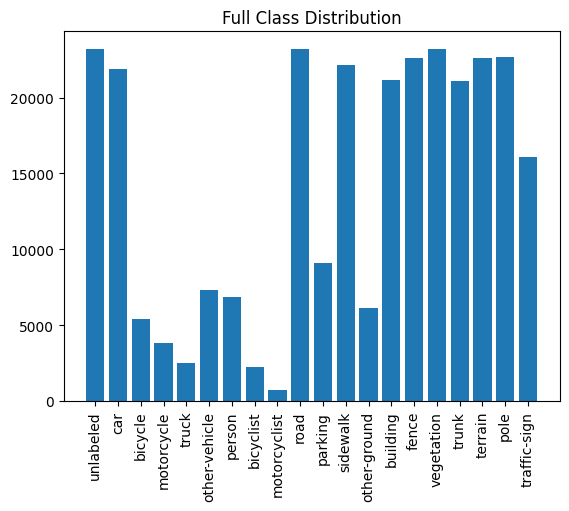

In [5]:
plt.bar(range(len(all_labels_dict)), list(all_labels_dict.values()), align='center')
plt.xticks(range(len(all_labels_dict)), [new_labels_names[i] for i in all_labels_dict.keys()])
plt.title("Full Class Distribution")
plt.xticks(rotation=90)

plt.show()

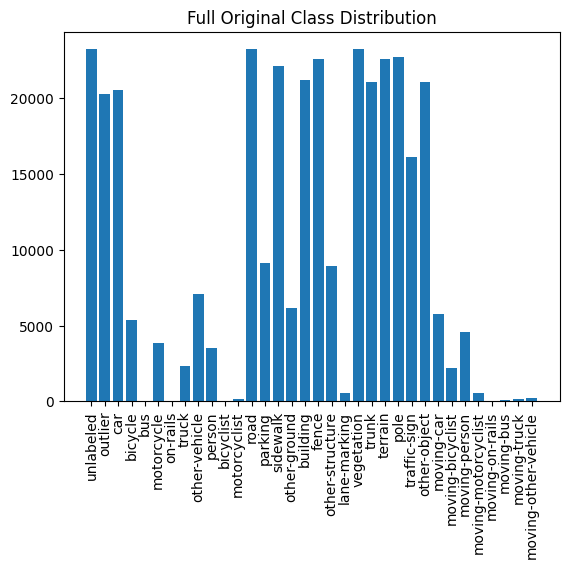

In [6]:
plt.bar(range(len(all_labels_dict_original)), list(all_labels_dict_original.values()), align='center')
plt.xticks(range(len(all_labels_dict_original)), list(all_labels_dict_original.keys()))
plt.xticks(rotation=90)
plt.title("Full Original Class Distribution")
plt.show()

In [7]:
outfile = Path("sem").stem
dataset = Path(
    "/home/konstanty/STUDIA/masters_1_sem/rob3/semantic-segmentation/stratified2/"
)
with open("semantic-kitti.yaml", "r") as f:
    kitty_conf = yaml.load(f, yaml.Loader)
all_labels_stratified = {}
for l in kitty_conf["learning_map_inv"]:
    all_labels_stratified[l] = 0
print(all_labels_stratified)
print(dataset)
print(outfile)
all_frames = 0
X = []
y = []
for seq in SEQUENCES:
    seqpath = "dataset/sequences/" + seq
    label_dir = dataset / seqpath / "labels"
    label_files = list(label_dir.iterdir())
    filtered_labels = []
    for file in label_files:
        X.append(file)
        all_frames += 1

        label, _ = load_labels(file)
        vals_unique = np.unique(label)
        # print(vals_unique)
        s = set()
        for v in vals_unique:
            s.add(parse_label(v, kitty_conf))
        y.append(list(s))
        for i in s:
            all_labels_stratified[i] += 1



{-1: 0, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}
/home/konstanty/STUDIA/masters_1_sem/rob3/semantic-segmentation/stratified2
sem


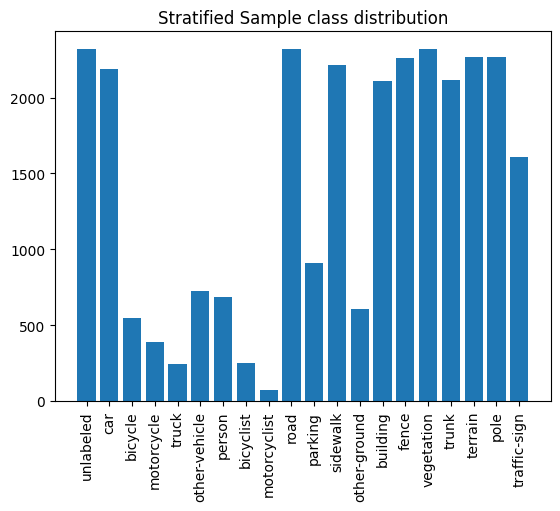

In [8]:
plt.bar(
    range(len(all_labels_stratified)),
    list(all_labels_stratified.values()),
    align="center",
)
plt.xticks(
    range(len(all_labels_stratified)),
    [new_labels_names[i] for i in all_labels_stratified.keys()],
)
plt.xticks(rotation=90)
plt.title("Stratified Sample class distribution")
plt.show()

In [9]:
outfile = Path("sem").stem
dataset = Path(
    "/home/konstanty/STUDIA/masters_1_sem/rob3/semantic-segmentation/oversampled/"
)
with open("semantic-kitti.yaml", "r") as f:
    kitty_conf = yaml.load(f, yaml.Loader)
all_labels_oversampled = {}
for l in kitty_conf["learning_map_inv"]:
    all_labels_oversampled[l] = 0
print(all_labels_oversampled)
print(dataset)
print(outfile)
all_frames = 0
X = []
y = []
for seq in SEQUENCES:
    seqpath = "dataset/sequences/" + seq
    label_dir = dataset / seqpath / "labels"
    label_files = list(label_dir.iterdir())
    filtered_labels = []
    for file in label_files:
        X.append(file)
        all_frames += 1

        label, _ = load_labels(file)
        vals_unique = np.unique(label)
        # print(vals_unique)
        s = set()
        for v in vals_unique:
            s.add(parse_label(v, kitty_conf))
        y.append(list(s))
        for i in s:
            all_labels_oversampled[i] += 1



{-1: 0, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0}
/home/konstanty/STUDIA/masters_1_sem/rob3/semantic-segmentation/oversampled
sem


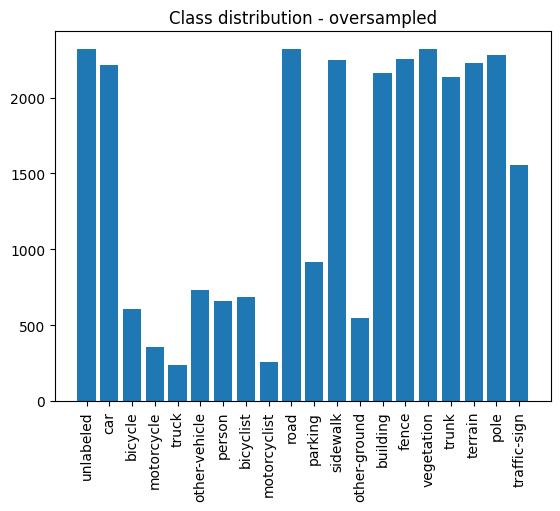

In [10]:
plt.bar(
    range(len(all_labels_oversampled)),
    list(all_labels_oversampled.values()),
    align="center",
)
plt.xticks(
    range(len(all_labels_oversampled)),
    [new_labels_names[i] for i in all_labels_oversampled.keys()],
)
plt.xticks(rotation=90)
plt.title("Class distribution - oversampled")
plt.show()

In [ ]:
def countFrames():
    pass
outfile = Path("sem").stem
dataset = Path("/home/konstanty/STUDIA/masters_1_sem/rob3/data_odometry_velodyne")
with open("semantic-kitti.yaml", "r") as f:
    kitty_conf = yaml.load(f, yaml.Loader)
all_labels_dict = {}
all_labels_dict_original = {}
for l in kitty_conf["labels"].values():
    all_labels_dict_original[l] = 0
for l in kitty_conf["learning_map_inv"]:
    all_labels_dict[l] = 0
print(all_labels_dict_original)
print(dataset)
print(outfile)
all_frames = 0
X = []
y = []
for seq in SEQUENCES:
    seqpath = "dataset/sequences/" + seq
    label_dir = dataset / seqpath / "labels"
    label_files = list(label_dir.iterdir())
    filtered_labels = []
    for file in label_files:
        X.append(file)
        all_frames += 1

        label, _ = load_labels(file)
        vals_unique = np.unique(label)
        # print(vals_unique)
        s = set()
        s2 = set()
        for v in vals_unique:
            s2.add(kitty_conf['labels'][v])
            s.add(parse_label(v, kitty_conf))
        y.append(list(s))
        for i in s:
            all_labels_dict[i] += 1
        for i in s2:
            all_labels_dict_original[i] +=1
